In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkConf

In [2]:
from pyspark.sql.functions import col, count, desc, lit \
                           ,from_unixtime, hour, array_contains, when

In [3]:
%matplotlib inline
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt # plotting

In [4]:
conf=SparkConf()

In [5]:
conf.set("spark.executor.memory", "2g")

In [6]:
spark = SparkSession.builder.config(conf=conf).appName("Lab02").getOrCreate()

In [7]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

# Загружаем данные

In [8]:
train=spark.read.parquet("/kaggle/sna/train")

In [9]:
print("Количество столбцов:"+str(len(train.columns)))

Количество столбцов:169


In [10]:
print("Количество строк:"+str(train.count()))

Количество строк:18286575


 Описание схемы

In [11]:
train.printSchema()

root
 |-- instanceId_userId: integer (nullable = true)
 |-- instanceId_objectType: string (nullable = true)
 |-- instanceId_objectId: integer (nullable = true)
 |-- audit_pos: long (nullable = true)
 |-- audit_clientType: string (nullable = true)
 |-- audit_timestamp: long (nullable = true)
 |-- audit_timePassed: long (nullable = true)
 |-- audit_experiment: string (nullable = true)
 |-- audit_resourceType: long (nullable = true)
 |-- metadata_ownerId: integer (nullable = true)
 |-- metadata_ownerType: string (nullable = true)
 |-- metadata_createdAt: long (nullable = true)
 |-- metadata_authorId: integer (nullable = true)
 |-- metadata_applicationId: long (nullable = true)
 |-- metadata_numCompanions: integer (nullable = true)
 |-- metadata_numPhotos: integer (nullable = true)
 |-- metadata_numPolls: integer (nullable = true)
 |-- metadata_numSymbols: integer (nullable = true)
 |-- metadata_numTokens: integer (nullable = true)
 |-- metadata_numVideos: integer (nullable = true)
 |-- me

In [12]:
train.dtypes

[('instanceId_userId', 'int'),
 ('instanceId_objectType', 'string'),
 ('instanceId_objectId', 'int'),
 ('audit_pos', 'bigint'),
 ('audit_clientType', 'string'),
 ('audit_timestamp', 'bigint'),
 ('audit_timePassed', 'bigint'),
 ('audit_experiment', 'string'),
 ('audit_resourceType', 'bigint'),
 ('metadata_ownerId', 'int'),
 ('metadata_ownerType', 'string'),
 ('metadata_createdAt', 'bigint'),
 ('metadata_authorId', 'int'),
 ('metadata_applicationId', 'bigint'),
 ('metadata_numCompanions', 'int'),
 ('metadata_numPhotos', 'int'),
 ('metadata_numPolls', 'int'),
 ('metadata_numSymbols', 'int'),
 ('metadata_numTokens', 'int'),
 ('metadata_numVideos', 'int'),
 ('metadata_platform', 'string'),
 ('metadata_totalVideoLength', 'int'),
 ('metadata_options', 'array<string>'),
 ('relationsMask', 'bigint'),
 ('userOwnerCounters_USER_FEED_REMOVE', 'double'),
 ('userOwnerCounters_USER_PROFILE_VIEW', 'double'),
 ('userOwnerCounters_VOTE_POLL', 'double'),
 ('userOwnerCounters_USER_SEND_MESSAGE', 'double')

Показать первые 10 строк

In [13]:
train.show(10,truncate=False)

+-----------------+---------------------+-------------------+---------+----------------+---------------+----------------+----------------+------------------+----------------+-------------------+------------------+-----------------+----------------------+----------------------+------------------+-----------------+-------------------+------------------+------------------+-----------------+-------------------------+--------------------------------------------------------------+-------------+----------------------------------+-----------------------------------+---------------------------+-----------------------------------+-------------------------------------+------------------------------------+--------------------------------------+--------------------------------------------+--------------------------------------+--------------------------------------+-------------------------------------------------+---------------------------------------+-------------------------------------------+-

In [16]:
train.limit(10).toPandas()

,instanceId_userId,instanceId_objectType,instanceId_objectId,audit_pos,audit_clientType,audit_timestamp,audit_timePassed,audit_experiment,audit_resourceType,metadata_ownerId,...,auditweights_userOwner_USER_PRESENT_SEND,auditweights_userOwner_USER_PROFILE_VIEW,auditweights_userOwner_USER_SEND_MESSAGE,auditweights_userOwner_USER_STATUS_COMMENT_CREATE,auditweights_userOwner_VIDEO,auditweights_userOwner_VOTE_POLL,auditweights_x_ActorsRelations,auditweights_likersSvd_spark_hyper,auditweights_source_PROMO,date
0,108,Post,18452434,0,MOB,1520194086477,10184811,XPRM-5386_G1,8,13680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-04
1,231,Post,31980032,3,MOB,1520113126655,132164,XPRM-5386_G2,8,42167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-04
2,423,Post,33834009,5,API,1520181187538,71525659,XPRM-5386_G9,14,12988,...,NaN,NaN,NaN,NaN,NaN,NaN,32.0,0.815833,NaN,2018-03-04
3,624,Post,25653019,5,WEB,1520149339921,1520149339921,XPRM-explore.q2,8,2772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-04
4,768,Post,24024934,20,API,1520180595763,624657,XPRM-5386_G1,8,20289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-04
5,1206,Post,25075524,2,WEB,1520160411706,1520160411706,XPRM-explore.q2,8,67250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-04
6,1752,Post,18132300,22,WEB,1520149355325,6498281,XPRM-5386_G10,8,60284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972178,NaN,2018-03-04
7,1752,Photo,2402728,2,WEB,1520149355325,6498281,XPRM-5386_G10,3,6480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-04
8,1752,Post,17153719,19,WEB,1520159055559,211038,XPRM-5386_G10,8,334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.926882,NaN,2018-03-04
9,2514,Post,19499734,12,API,1520180648026,22002490,XPRM-5386_G1,8,34136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.728046,NaN,2018-03-04


Подсчитать количество различных значений по столбцам

In [17]:
for c in train.columns:
   print(c+" distinct "+str(train.select(c).distinct().count())) 

instanceId_userId distinct 3916579
instanceId_objectType distinct 3
instanceId_objectId distinct 2936576
audit_pos distinct 305
audit_clientType distinct 3
audit_timestamp distinct 17410064
audit_timePassed distinct 10462419
audit_experiment distinct 21
audit_resourceType distinct 5
metadata_ownerId distinct 81272
metadata_ownerType distinct 2
metadata_createdAt distinct 1942253
metadata_authorId distinct 298567
metadata_applicationId distinct 1
metadata_numCompanions distinct 92
metadata_numPhotos distinct 116
metadata_numPolls distinct 9
metadata_numSymbols distinct 15960
metadata_numTokens distinct 3604
metadata_numVideos distinct 34
metadata_platform distinct 6
metadata_totalVideoLength distinct 54341
metadata_options distinct 397
relationsMask distinct 1
userOwnerCounters_USER_FEED_REMOVE distinct 1352165
userOwnerCounters_USER_PROFILE_VIEW distinct 2
userOwnerCounters_VOTE_POLL distinct 2
userOwnerCounters_USER_SEND_MESSAGE distinct 2
userOwnerCounters_USER_DELETE_MESSAGE distinc

Посчитать количество ненулевых значений

In [18]:
for c in train.columns:
   print(c+" count not null "+str(train.select(c).filter(col(c).isNotNull()).count()))

instanceId_userId count not null 18286575
instanceId_objectType count not null 18286575
instanceId_objectId count not null 18286575
audit_pos count not null 18286575
audit_clientType count not null 18286575
audit_timestamp count not null 18286575
audit_timePassed count not null 18286575
audit_experiment count not null 18286575
audit_resourceType count not null 18286575
metadata_ownerId count not null 18286575
metadata_ownerType count not null 18286575
metadata_createdAt count not null 18286575
metadata_authorId count not null 18286575
metadata_applicationId count not null 18286575
metadata_numCompanions count not null 18286575
metadata_numPhotos count not null 18286575
metadata_numPolls count not null 18286575
metadata_numSymbols count not null 18286575
metadata_numTokens count not null 18286575
metadata_numVideos count not null 18286575
metadata_platform count not null 18286575
metadata_totalVideoLength count not null 18286575
metadata_options count not null 18286575
relationsMask cou

Построить топ групп на портале

In [19]:
topgrp=train.groupBy("metadata_ownerId").agg(count(lit(1)).alias("cnt")).orderBy(col("cnt").desc())

In [20]:
topgrp.show(50,False)

+----------------+-----+
|metadata_ownerId|cnt  |
+----------------+-----+
|37463           |71558|
|76851           |53090|
|11222           |49656|
|65305           |46334|
|8225            |44342|
|38703           |44308|
|18942           |42829|
|62833           |40545|
|79619           |40540|
|19481           |40370|
|11058           |39888|
|77398           |38763|
|14285           |38513|
|67111           |37648|
|9182            |36496|
|51346           |36443|
|64184           |35938|
|12639           |35694|
|20350           |33749|
|60195           |33428|
|34963           |33068|
|11163           |32991|
|9236            |31951|
|17215           |30585|
|32890           |30338|
|14959           |28988|
|66769           |28842|
|32841           |28630|
|71284           |28023|
|23051           |27980|
|83218           |27665|
|82227           |27201|
|26843           |26459|
|32839           |26277|
|26735           |26245|
|23080           |26234|
|30830           |26075|


Построите гистограммы популярности/активности групп на портале по времени суток

In [21]:
trainGrpByHourP=train.withColumn("hour",hour(from_unixtime(col("audit_timestamp")/1000))) \
               .select("hour").groupBy("hour").agg(count(lit(1)).alias("cnt")).orderBy("hour")

In [22]:
ptrainGrpByHourP=trainGrpByHourP.toPandas()

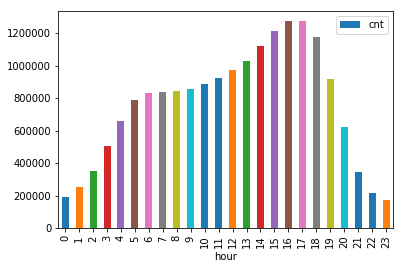

In [23]:
ptrainGrpByHourP.plot("hour","cnt","bar")

In [24]:
trainGrpByHourA=train.withColumn("hour",hour(from_unixtime(col("metadata_CreatedAt")/1000))) \
               .select("hour").groupBy("hour").agg(count(lit(1)).alias("cnt")).orderBy("hour")

In [25]:
ptrainGrpByHourA=trainGrpByHourA.toPandas()

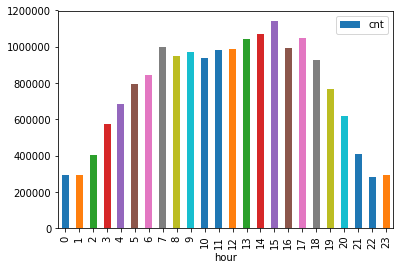

In [26]:
ptrainGrpByHourA.plot("hour","cnt","bar")

Посчитайте корреляцию признаков с целевой переменной 

In [27]:
trainWithTarget=train.withColumn("target",when(array_contains(col("feedback"),"Liked"),1.0) \
                 .otherwise(0.0))

In [28]:
colsToCheck=list(map(lambda x:x[0],list(filter(lambda x: (x[1]=="bigint") | (x[1]=="int") | (x[1]=="double"), \
            train.dtypes))))

In [29]:
colsToCheck

['instanceId_userId',
 'instanceId_objectId',
 'audit_pos',
 'audit_timestamp',
 'audit_timePassed',
 'audit_resourceType',
 'metadata_ownerId',
 'metadata_createdAt',
 'metadata_authorId',
 'metadata_applicationId',
 'metadata_numCompanions',
 'metadata_numPhotos',
 'metadata_numPolls',
 'metadata_numSymbols',
 'metadata_numTokens',
 'metadata_numVideos',
 'metadata_totalVideoLength',
 'relationsMask',
 'userOwnerCounters_USER_FEED_REMOVE',
 'userOwnerCounters_USER_PROFILE_VIEW',
 'userOwnerCounters_VOTE_POLL',
 'userOwnerCounters_USER_SEND_MESSAGE',
 'userOwnerCounters_USER_DELETE_MESSAGE',
 'userOwnerCounters_USER_INTERNAL_LIKE',
 'userOwnerCounters_USER_INTERNAL_UNLIKE',
 'userOwnerCounters_USER_STATUS_COMMENT_CREATE',
 'userOwnerCounters_PHOTO_COMMENT_CREATE',
 'userOwnerCounters_MOVIE_COMMENT_CREATE',
 'userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE',
 'userOwnerCounters_COMMENT_INTERNAL_LIKE',
 'userOwnerCounters_USER_FORUM_MESSAGE_CREATE',
 'userOwnerCounters_PHOTO_MARK_CREA

In [31]:
corrs=list()
for c in colsToCheck:
  corrs.append((c,trainWithTarget.corr(c,"target","pearson")))

In [32]:
corrs

[('instanceId_userId', 0.03197228784565751),
 ('instanceId_objectId', 0.03876479710067909),
 ('audit_pos', 0.005763417569643013),
 ('audit_timestamp', -0.0019627484415242384),
 ('audit_timePassed', 0.013533036575524455),
 ('audit_resourceType', 0.04556814618859267),
 ('metadata_ownerId', 0.011679487961495113),
 ('metadata_createdAt', 0.0007344791555101123),
 ('metadata_authorId', 0.007233333042612958),
 ('metadata_applicationId', nan),
 ('metadata_numCompanions', -0.004849676228064266),
 ('metadata_numPhotos', 0.011189914312247778),
 ('metadata_numPolls', 0.08114650487156023),
 ('metadata_numSymbols', -0.03328405797098008),
 ('metadata_numTokens', -0.03328994955853082),
 ('metadata_numVideos', -0.01294031790295708),
 ('metadata_totalVideoLength', -0.01438299579087669),
 ('relationsMask', nan),
 ('userOwnerCounters_USER_FEED_REMOVE', -0.053863863924167574),
 ('userOwnerCounters_USER_PROFILE_VIEW', nan),
 ('userOwnerCounters_VOTE_POLL', nan),
 ('userOwnerCounters_USER_SEND_MESSAGE', nan)

In [49]:
corrs_df=pd.DataFrame(corrs,columns=['column','correlation'])

In [50]:
corrs_df

,column,correlation
0,instanceId_userId,0.031972
1,instanceId_objectId,0.038765
2,audit_pos,0.005763
3,audit_timestamp,-0.001963
4,audit_timePassed,0.013533
5,audit_resourceType,0.045568
6,metadata_ownerId,0.011679
7,metadata_createdAt,0.000734
8,metadata_authorId,0.007233
9,metadata_applicationId,NaN


Покажем столбцы с порядке убывания коэффициента корреляции

In [51]:
corrs_df.sort_values(['correlation'],ascending=False)

,column,correlation
105,auditweights_ctr_high,0.145487
138,auditweights_userOwner_CREATE_LIKE,0.093074
117,auditweights_isRandom,0.089359
133,auditweights_svd_prelaunch,0.087271
12,metadata_numPolls,0.081147
41,userOwnerCounters_CREATE_LIKE,0.080722
134,auditweights_svd_spark,0.077085
5,audit_resourceType,0.045568
109,auditweights_feedStats,0.044118
101,objectId,0.038765


In [52]:
spark.stop

<bound method SparkSession.stop of <pyspark.sql.session.SparkSession object at 0x7f970ba45f98>>